**Умова:**

На основі файлу banking.csv, що міститься в репозиторії лекції, виконайте наступні дії:

1. Сформуйте тестовий та тренувальний датасети (розмір тестової вибірки 0.3)

2. Застосуйте логістичну регресію для прогнозування цільової метрики **y** (ймовірність того, що клієнт відкриє вклад у банку).

3. Оцініть модуль за допомогою матриці похибок, метрик percision, recall, F1-score. Побудуйте AUC-ROC криву для моделі.

**1.1. Завантажимо дані з файлу та відобразимо декілька рядків для візуального аналізу.**

In [70]:
import pandas as pd

df = pd.read_csv('banking.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


**1.2. Видалимо дані, що не несуть інформативності в цільовому запиті.**

In [71]:
df = df.drop(['default', 'contact', 'month', 'day_of_week'], axis=1)                  #отримали 17 стовпців

**1.3. Виконаємо кодування категоріальних ознак**

In [72]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
df[['job', 'marital', 'education', 'housing', 'loan', 'poutcome']] = oe.fit_transform(df[['job', 'marital', 'education', 'housing', 'loan', 'poutcome']])


**1.4. Сформуємо тестовий та тренувальний датасети**

In [297]:
from sklearn.model_selection import train_test_split

predictors = list(df.head(0).iloc[:, :-1])
outcome = 'y'

X, y = pd.DataFrame(df[predictors]), pd.DataFrame(df[outcome])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

**2.1. Виконаємо візуалізацію даних.**

***Для зручності візуалізації розіб'ємо дані на декілька частин.***

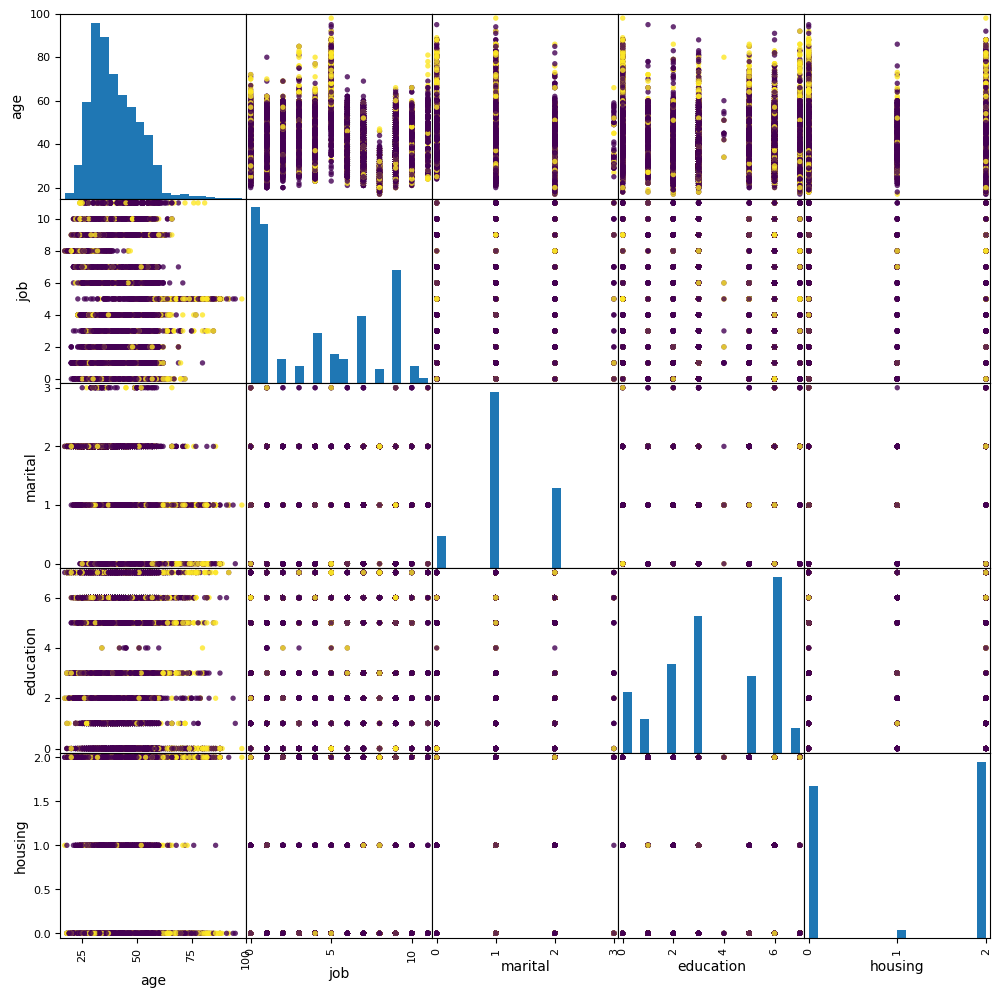

In [298]:
import matplotlib.pyplot as plt


grr_1 = pd.plotting.scatter_matrix(X_train.iloc[:, 0:5], c=y_train['y'], figsize=(12, 12), 
                                   hist_kwds={'bins': 20}, s=60, alpha=.8)

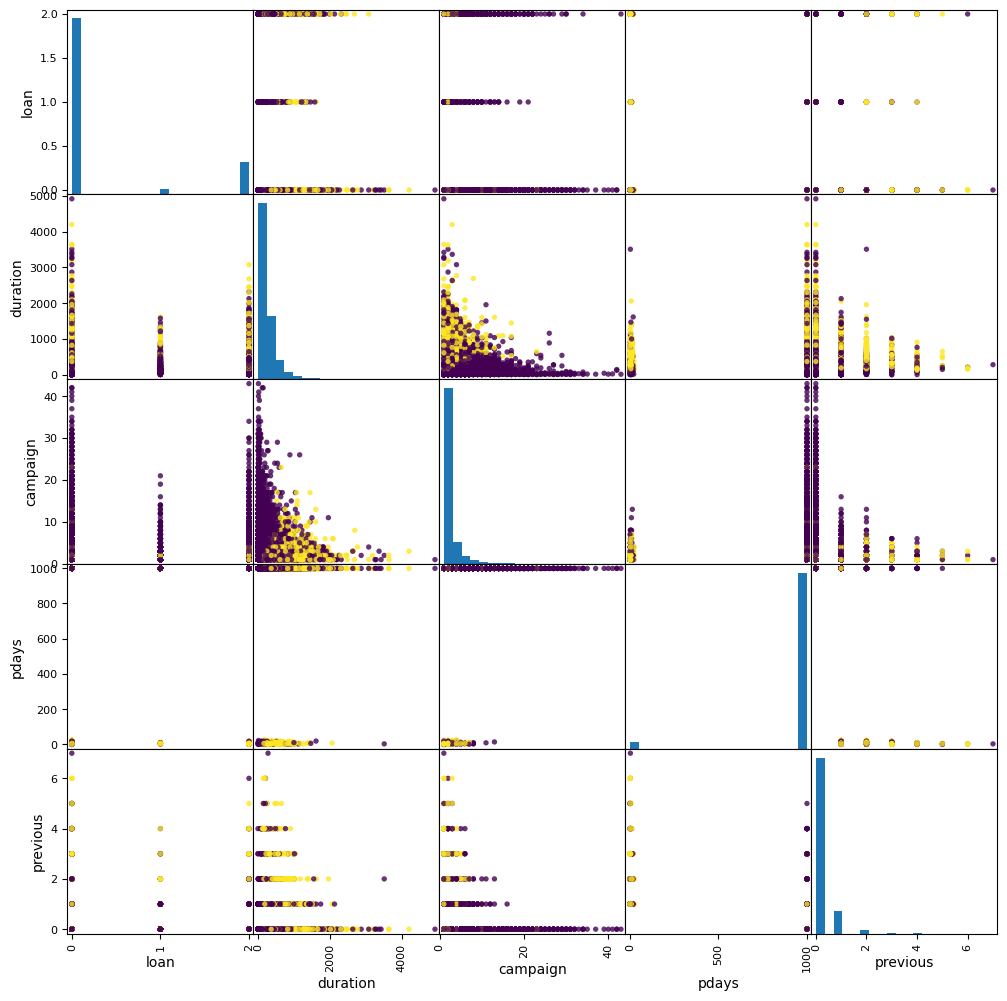

In [299]:
grr_2 = pd.plotting.scatter_matrix(X_train.iloc[:, 5:10], c=y_train['y'], figsize=(12, 12), 
                                   hist_kwds={'bins': 20}, s=60, alpha=.8)

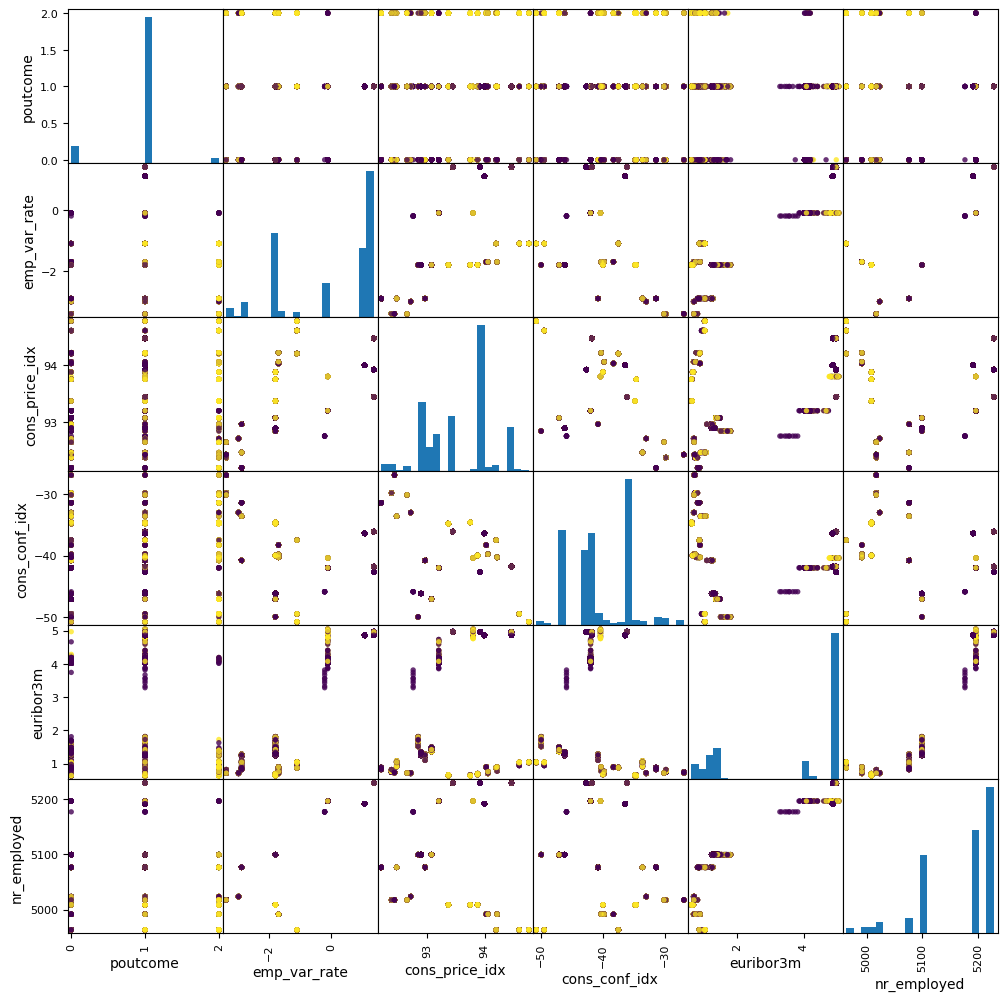

In [300]:
grr_3 = pd.plotting.scatter_matrix(X_train.iloc[:, 10:16], c=y_train['y'], figsize=(12, 12), 
                                   hist_kwds={'bins': 20}, s=60, alpha=.8)

***Проаналізувавши візуальне відображення взаємозв'язків відкриття вкладу по відношенню до інших даних,
можна зробити висновок, що є достатньо признаків, які задовільно розділяють факт відкриття до його відсутності. Т.е. з високою вірогідністю, вдасться побудувати модель задовільної якості.***

**2.2 Побудуємо модель логістичної регресії.**

In [284]:
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import KFold
import numpy as np


model = LogisticRegression()
model.fit(X_train, y_train)


kfold = KFold(n_splits=11)



for train_index, test_index in kfold.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model.fit(X_train_fold, y_train_fold)       

C:\users\админ\appdata\local\programs\python\python311\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\users\админ\appdata\local\programs\python\python311\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\users\админ\appdata\local\programs\python\python311\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed w

**2.3. Для порівняння, побудуємо модель KNeighborsClassifier.**

In [288]:
from sklearn.neighbors  import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=36)
knn.fit(X_train, y_train)


kfold = KFold(n_splits=8)



for train_index, test_index in kfold.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    knn.fit(X_train_fold, y_train_fold)     

C:\users\админ\appdata\local\programs\python\python311\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\users\админ\appdata\local\programs\python\python311\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\users\админ\appdata\local\programs\python\python311\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\users\админ\appdata\local\programs\python\python311\lib\site-packages\sklearn\neighbors\_classification.py:215: 

**3.1. Зробимо оцінку і порівняння цих моделей**

In [296]:
from sklearn import metrics

y_predict_1 = model.predict(X_test)
print("Logistic Rregression:\n_____________________________")
print("Accuracy: ", metrics.accuracy_score(y_test, y_predict_1))
print("Precision: ", metrics.precision_score(y_test, y_predict_1))
print("Recall: ", metrics.recall_score(y_test, y_predict_1))
print("F1:     ", metrics.f1_score(y_test, y_predict_1, average = None))

y_predict_2 = knn.predict(X_test)
print("\n\nKNeighborsClassifier:\n_____________________________")
print("Accuracy: ", metrics.accuracy_score(y_test, y_predict_2))
print("Precision: ", metrics.precision_score(y_test, y_predict_2))
print("Recall: ", metrics.recall_score(y_test, y_predict_2))
print("F1:     ", metrics.f1_score(y_test, y_predict_2, average = None))

Logistic Rregression:
_____________________________
Accuracy:  0.9114671845917294
Precision:  0.6784810126582278
Recall:  0.38953488372093026
F1:      [0.95148128 0.49492151]


KNeighborsClassifier:
_____________________________
Accuracy:  0.9140568099053168
Precision:  0.6554455445544555
Recall:  0.4811046511627907
F1:      [0.9524364 0.5549036]


***Порівнюючи ці моделі можна зробити висновок, що, вцілому, моделі мають практичне однакову досить високу якість.***

**3.2. Побудуємо AUC-ROC криву для моделі логістичної регресії.**

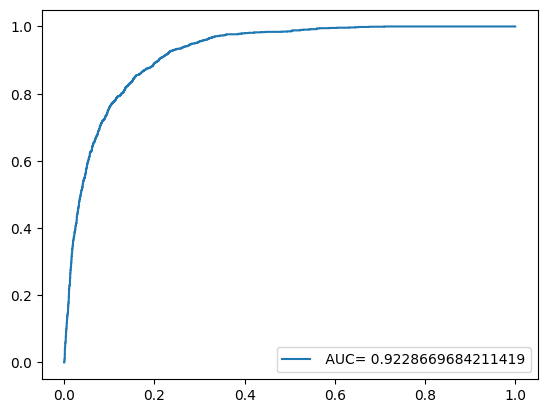

In [302]:
y_predict_proba = model.predict_proba (X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_predict_proba)
auc = metrics.roc_auc_score (y_test, y_predict_proba)

plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.legend(loc=4)
plt.show()

***AUC-ROC крива охоплює достатньо велику площу, що свідчить про хорошу здатність моделі розділяти класи.***